# Case Study on Regression
The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10?<br>
Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better

___
# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car_age_price.csv")

In [3]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
df.shape

(112, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
df.isnull().sum()

Year     0
Price    0
dtype: int64

## Plotting heatmap of Correlation matrix

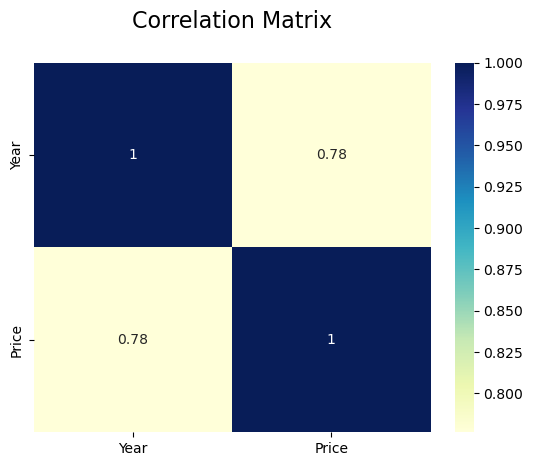

In [7]:
corrmatrix = df.corr()
sns.heatmap(corrmatrix, annot = True, cmap = 'YlGnBu')
plt.title("Correlation Matrix\n", size = 16)
plt.show()

## Plotting scatterplot of year of manufacture vs price

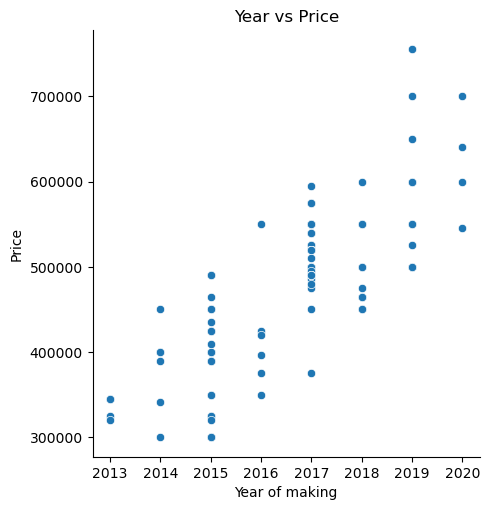

In [8]:
sns.relplot(data = df, x = 'Year', y = 'Price')
plt.title('Year vs Price')
plt.xlabel('Year of making')
plt.show()

## Plotting histogram of Number of models per year

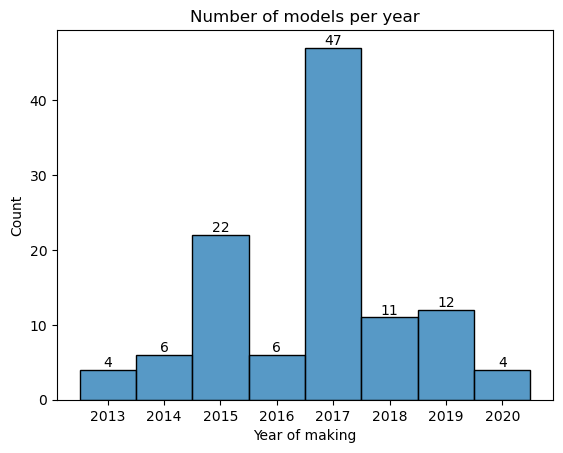

In [9]:
ax = sns.histplot(data = df, x = 'Year', element = 'bars', stat = 'count', discrete = True)
ax.bar_label(ax.containers[1])
plt.title('Number of models per year')
plt.xlabel('Year of making')
plt.show()

## Plotting distribution plot of prices per year

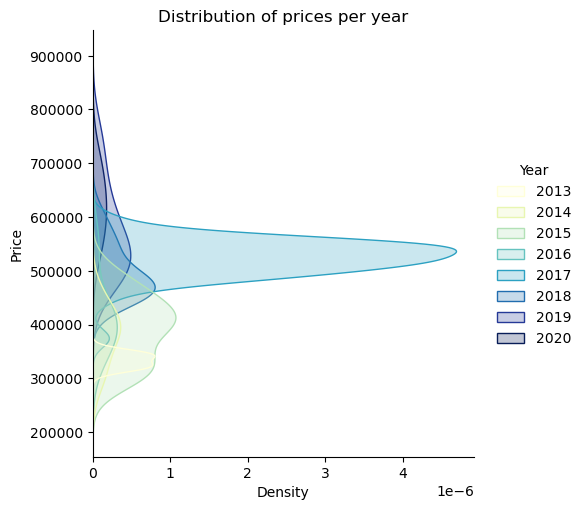

In [10]:
sns.displot(data = df, y = 'Price', hue = 'Year', kind = 'kde', palette = 'YlGnBu', fill = True)
plt.title('Distribution of prices per year')
plt.show()

## Groupwise description of data

In [11]:
df.groupby(by = 'Year').describe()

Price                                                             \
     count           mean           std       min       25%       50%   
Year                                                                    
2013   4.0  333750.000000  13149.778198  320000.0  323750.0  335000.0   
2014   6.0  380166.666667  52384.794231  300000.0  353250.0  395000.0   
2015  22.0  390454.454545  61274.296004  300000.0  331250.0  400000.0   
2016   6.0  419333.333333  69890.390374  350000.0  380250.0  408000.0   
2017  47.0  523106.361702  36505.655994  375000.0  500000.0  520000.0   
2018  11.0  497272.727273  49211.971936  450000.0  465000.0  475000.0   
2019  12.0  577500.000000  85851.351448  500000.0  500000.0  550000.0   
2020   4.0  621250.000000  65367.550563  545000.0  586250.0  620000.0   

                           
            75%       max  
Year                       
2013  345000.00  345000.0  
2014  400000.00  450000.0  
2015  432499.25  490000.0  
2016  423750.00  550000.0  
2017  550000.00  595000.0  
2018  525000.00  600000.0  
2019  612500.00  755000.0  
2020  655000.00  700000.0

<b>Insights:</b>
- The average price usually increases for more recent years of manufacture
- Only exception is 2018, where price slightly decreases
- Maximum price increases for all years except 2020
- Some years have less number of cars compared to others

___
# Preparing and splitting data for regression model

In [12]:
x = np.array(df['Year']).reshape([-1,1])
y = df['Price']

Skipping scaling/normalization because there was no improvement in results when they were used.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.25)

___
# Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE =', mean_squared_error(y_test, y_pred))
print('R2 Score =', r2_score(y_test, y_pred))

MSE = 3878767151.073449
R2 Score = 0.4347961632108023


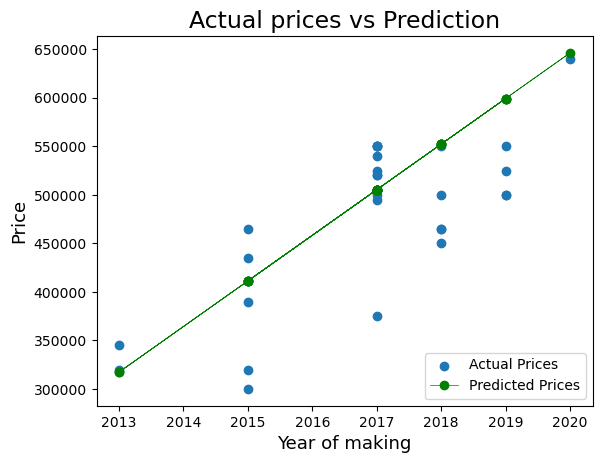

In [16]:
plt.scatter(x = x_test, y = y_test, label = 'Actual Prices')
plt.plot(x_test, y_pred, color = 'green', marker = 'o', linewidth = 0.5, label = 'Predicted Prices')
plt.xlabel('Year of making', size = 13)
plt.ylabel('Price', size = 13)
plt.title('Actual prices vs Prediction', size = 17)
plt.legend(loc = 'lower right')
plt.show()

## Predicting price for 2022

In [17]:
x_2022 = np.array([2022]).reshape([-1,1])
y_2022 = model.predict(x_2022)
print("Possible price of 2nd hand 2022 model grand i10 is", int(y_2022[0]))

Possible price of 2nd hand 2022 model grand i10 is 740160


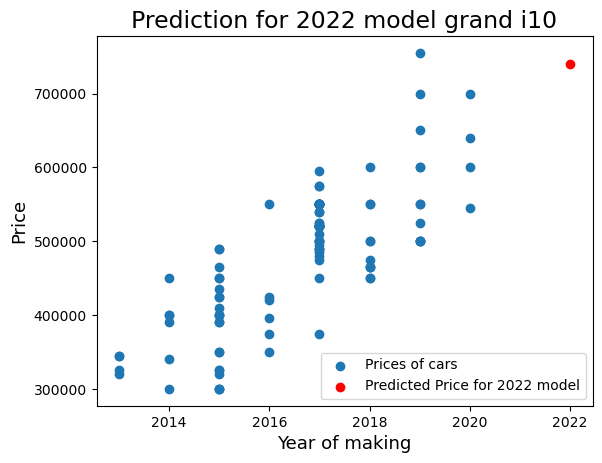

In [18]:
plt.scatter(x = x, y = y, label = 'Prices of cars')
plt.scatter(2022, y_2022, color = 'red', label = 'Predicted Price for 2022 model')
plt.xlabel('Year of making', size = 13)
plt.ylabel('Price', size = 13)
plt.title('Prediction for 2022 model grand i10', size = 17)
plt.legend(loc = 'lower right')
plt.show()

___
# Lasso Regression

In [69]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 30000)    #Found value of alpha through trial and error
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE =', mean_squared_error(y_test, y_pred))
print('R2 Score =', r2_score(y_test, y_pred))

MSE = 3377516448.4029093
R2 Score = 0.5078371087762675


<b>Lasso Regression has better MSE and R2 score than Linear Regression.</b><br>
<b>It is performing better than Linear Regression</b>

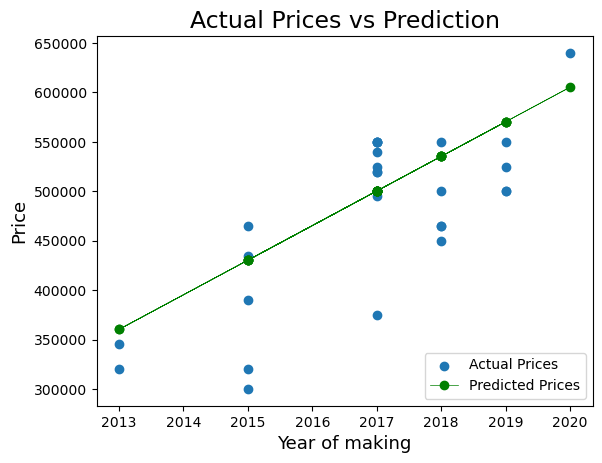

In [71]:
plt.scatter(x = x_test, y = y_test, label = 'Actual Prices')
plt.plot(x_test, y_pred, color = 'green', marker = 'o', linewidth = 0.5, label = 'Predicted Prices')
plt.xlabel('Year of making', size = 13)
plt.ylabel('Price', size = 13)
plt.title('Actual Prices vs Prediction', size = 17)
plt.legend(loc = 'lower right')
plt.show()

## Predicting price for 2022

In [72]:
x_2022 = np.array([2022]).reshape([-1,1])
y_2022 = lasso.predict(x_2022)
print("Possible price of 2nd hand 2022 model grand i10 is", int(y_2022[0]))

Possible price of 2nd hand 2022 model grand i10 is 675288


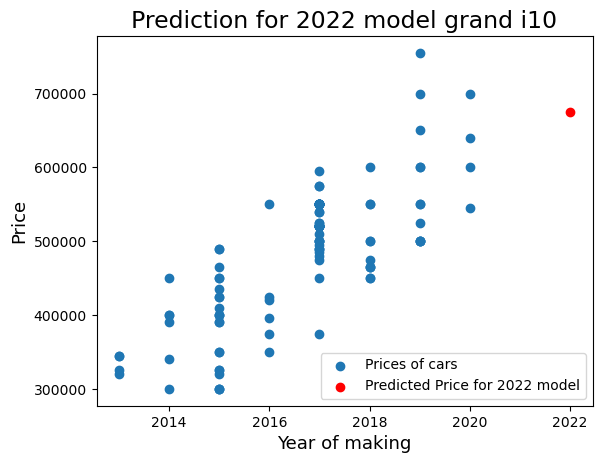

In [73]:
plt.scatter(x = x, y = y, label = 'Prices of cars')
plt.scatter(2022, y_2022, color = 'red', label = 'Predicted Price for 2022 model')
plt.xlabel('Year of making', size = 13)
plt.ylabel('Price', size = 13)
plt.title('Prediction for 2022 model grand i10', size = 17)
plt.legend(loc = 'lower right')
plt.show()